<a href="https://colab.research.google.com/github/LukaLujan/Loan-Approval-Prediction/blob/main/krediti_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df =pd.read_csv("train_loan.csv")


In [5]:
print(len(df))
df.head()

614


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
df.Gender.isna().sum()

13

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
pd.crosstab(df["Education"], df["Loan_Status"], margins=True)

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


In [12]:
pd.crosstab(df["Education"], df["Loan_Status"], margins=True)

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


In [13]:
len(df.loc[df["LoanAmount"]<=df["LoanAmount"].quantile(0.25)])

154

In [14]:
len(df.loc[df["LoanAmount"]>=df["LoanAmount"].quantile(0.75)])

149

In [15]:
len(df.loc[df["LoanAmount"]<=df["LoanAmount"].quantile(0.75)])

446

In [16]:
pd.crosstab(df["LoanAmount"]<=df["LoanAmount"].quantile(0.25), df["Loan_Status"], margins=True)

Loan_Status,N,Y,All
LoanAmount,,,
False,145,315,460
True,47,107,154
All,192,422,614


In [17]:
pd.crosstab(df["LoanAmount"]<=df["LoanAmount"].quantile(0.25), df["Loan_Status"], margins=True, normalize="index")

Loan_Status,N,Y
LoanAmount,,
False,0.315217,0.684783
True,0.305195,0.694805
All,0.312704,0.687296


In [18]:
pd.crosstab(df["LoanAmount"]<=df["LoanAmount"].quantile(0.75), df["Loan_Status"], margins=True)

Loan_Status,N,Y,All
LoanAmount,,,
False,63,105,168
True,129,317,446
All,192,422,614


In [19]:
pd.crosstab(df["LoanAmount"]<=df["LoanAmount"].quantile(0.75), df["Loan_Status"], margins=True, normalize="index")

Loan_Status,N,Y
LoanAmount,,
False,0.375000,0.625000
True,0.289238,0.710762
All,0.312704,0.687296


In [20]:
df.loc[df["LoanAmount"]<=df["LoanAmount"].quantile(0.75)]["Loan_Status"].value_counts(normalize="True")

Y    0.710762
N    0.289238
Name: Loan_Status, dtype: float64

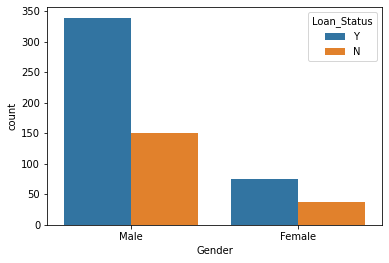

In [21]:
sns.countplot(x="Gender",  hue="Loan_Status" ,data=df)

In [22]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

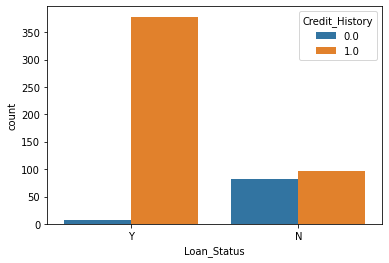

In [23]:
sns.countplot(x="Loan_Status", hue="Credit_History", data=df)

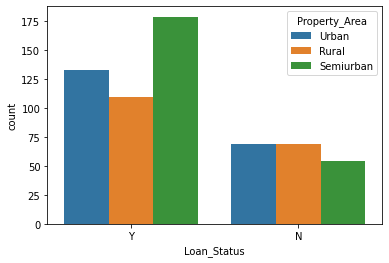

In [24]:
sns.countplot(x="Loan_Status", hue="Property_Area", data=df)

In [25]:
std=round(df['LoanAmount'].std(),2)
mn=round(df['LoanAmount'].mean(),2)

In [26]:
print(std, mn)

85.59 146.41


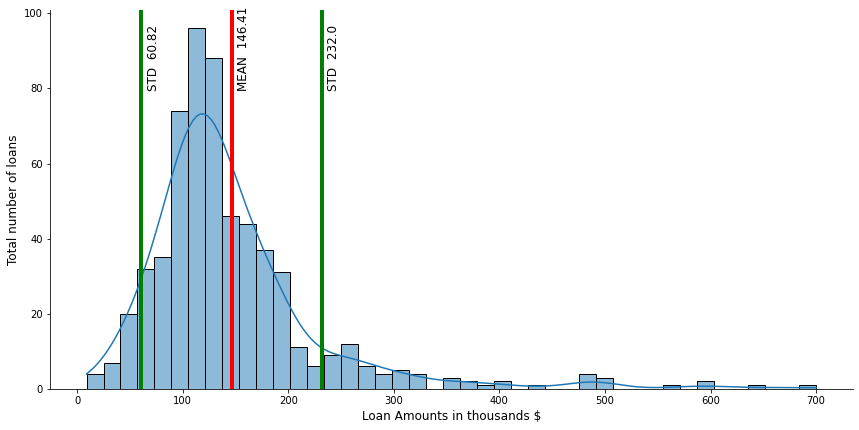

In [27]:

sns.displot(df['LoanAmount'],kde=True, height=6, aspect=12/6)
plt.axvline(df['LoanAmount'].mean(),color="r", linewidth=4 )
plt.axvline(df['LoanAmount'].mean()+std,color="g", linewidth=4 )
plt.axvline(df['LoanAmount'].mean()-std,color="g", linewidth=4 )
plt.text(df['LoanAmount'].mean()+5,80, f'MEAN  {mn}',rotation=90, fontsize=12)
plt.text(df['LoanAmount'].mean()+std+5,80, f'STD  {round(mn+std,2)}',rotation=90, fontsize=12)
plt.text(df['LoanAmount'].mean()-std+5,80, f'STD  {round(mn-std,2)}',rotation=90, fontsize=12)
plt.ylabel("Total number of loans", fontsize=12);
plt.xlabel("Loan Amounts in thousands $", fontsize=12);

In [28]:
round(df.loc[df["Education"]=="Graduate"]["Loan_Status"].value_counts(normalize=True),2)

Y    0.71
N    0.29
Name: Loan_Status, dtype: float64

In [29]:
round(df.loc[df["Education"]=="Not Graduate"]["Loan_Status"].value_counts(normalize=True),2)

Y    0.61
N    0.39
Name: Loan_Status, dtype: float64

In [30]:
grad0=round(df.loc[df["Education"]=="Graduate"]["Loan_Status"].value_counts(normalize=True),2)[0]
grad1=round(df.loc[df["Education"]=="Graduate"]["Loan_Status"].value_counts(normalize=True),2)[1]
Ngrad0 = round(df.loc[df["Education"]=="Not Graduate"]["Loan_Status"].value_counts(normalize=True),2)[0]
Ngrad1 = round(df.loc[df["Education"]=="Not Graduate"]["Loan_Status"].value_counts(normalize=True),2)[1]

In [31]:
percs =grad0, grad1, Ngrad0, Ngrad1
percs =list(percs)
percs

[0.71, 0.29, 0.61, 0.39]

In [32]:
def swapPositions(list, pos1, pos2):
 
    # Storing the two elements
    # as a pair in a tuple variable get
    get = list[pos1], list[pos2]
      
    # unpacking those elements
    list[pos2], list[pos1] = get
      
    return list

pos1, pos2  = 1, 2

In [33]:
swapPositions(percs, pos1, pos2)

[0.71, 0.61, 0.29, 0.39]

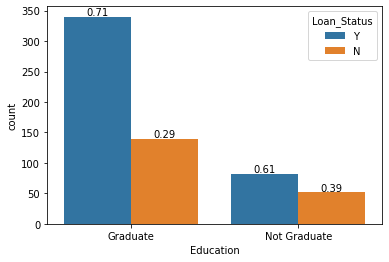

In [34]:
ax=sns.countplot(x="Education",  hue="Loan_Status" ,data=df)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 2, percs[i],ha="center")

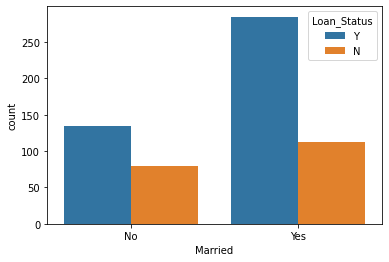

In [35]:
sns.countplot(x="Married",  hue="Loan_Status" ,data=df);

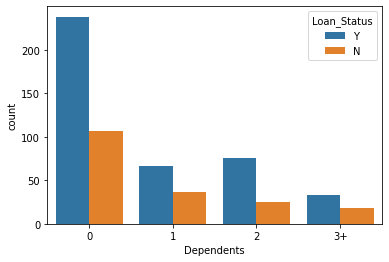

In [36]:
sns.countplot(x="Dependents",  hue="Loan_Status" ,data=df);


In [37]:
Zero =round(df.loc[df["Dependents"]=="0"]["Loan_Status"].value_counts(normalize=True),2)[1]
One =round(df.loc[df["Dependents"]=="1"]["Loan_Status"].value_counts(normalize=True),2)[1]
Twos =round(df.loc[df["Dependents"]=="2"]["Loan_Status"].value_counts(normalize=True),2)[1]
Three_plus =round(df.loc[df["Dependents"]=="3+"]["Loan_Status"].value_counts(normalize=True),2)[1]

In [38]:
dep_labels =["Zero", "One", "Two", "Three+"]
dep_values =[Zero, One, Twos, Three_plus]

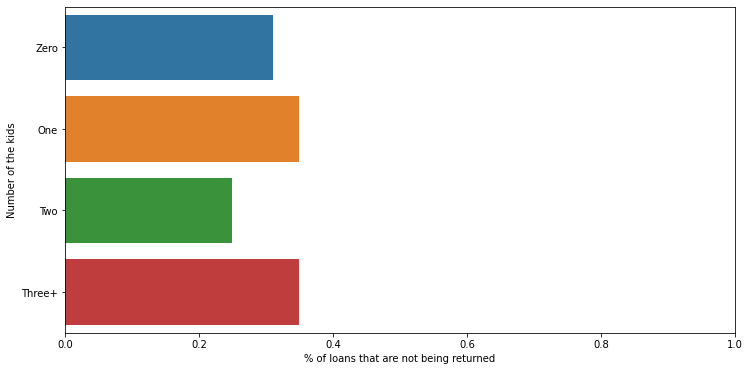

In [39]:
f, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=dep_values,y=dep_labels)
ax.set(xlim=(0, 1), ylabel="Number of the kids",
       xlabel="% of loans that are not being returned");


In [40]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

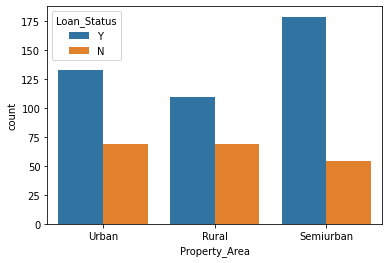

In [41]:
sns.countplot(x="Property_Area",  hue="Loan_Status" ,data=df)

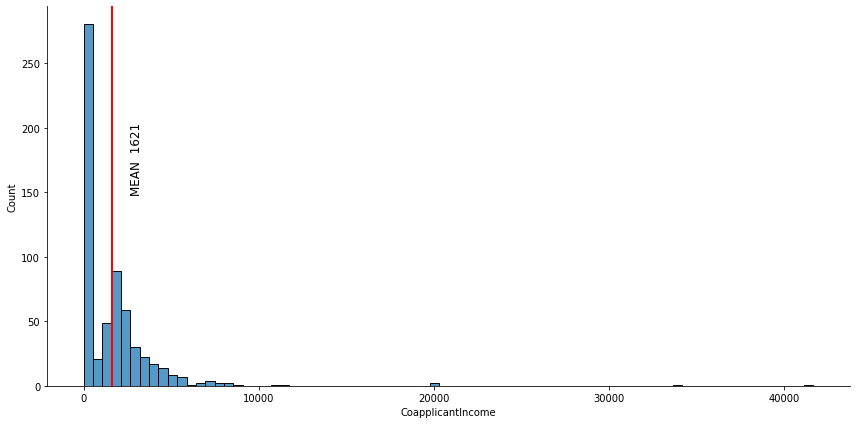

In [42]:
copl_mean=df['CoapplicantIncome'].mean()
sns.displot(df['CoapplicantIncome'], height=6, aspect=12/6)
plt.axvline(df['CoapplicantIncome'].mean(),color="r", linewidth=2 )
plt.text(df['CoapplicantIncome'].mean()+1000,150, f'MEAN  {round(copl_mean)}',rotation=90, fontsize=12);

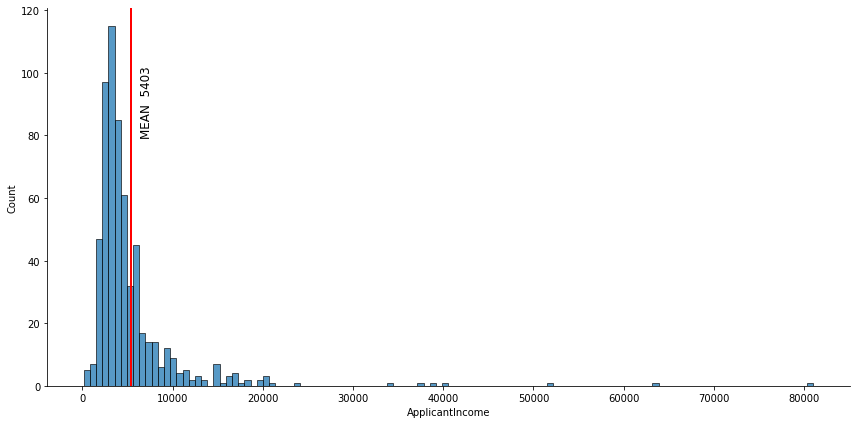

In [43]:
apl_mean= round(df['ApplicantIncome'].mean())
sns.displot(df['ApplicantIncome'], height=6, aspect=12/6)
plt.axvline(df['ApplicantIncome'].mean(),color="r", linewidth=2 )
plt.text(df['ApplicantIncome'].mean()+1000,80, f'MEAN  {apl_mean}',rotation=90, fontsize=12);

In [44]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

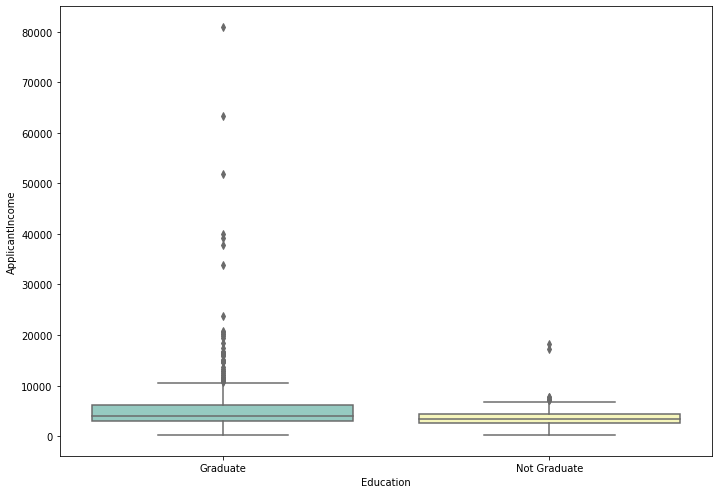

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x="Education", y="ApplicantIncome", #hue="Loan_Status",
                 data=df, palette="Set3");


In [46]:
df.loc[df["Education"]=="Not Graduate"].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,134.000000,134.000000,127.000000,128.000000,121.000000
mean,3777.283582,1276.544776,118.409449,332.156250,0.785124
std,2237.081586,1310.343602,39.773636,77.079613,0.412444
min,210.000000,0.000000,25.000000,36.000000,0.000000
25%,2583.000000,0.000000,96.500000,360.000000,1.000000
50%,3357.500000,1356.500000,115.000000,360.000000,1.000000
75%,4333.000000,2028.250000,133.000000,360.000000,1.000000
max,18165.000000,7101.000000,279.000000,480.000000,1.000000


In [47]:
df.loc[df["Education"]=="Graduate"].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,465.000000,472.000000,443.000000
mean,5857.433333,1717.474833,154.060215,344.669492,0.857788
std,6739.797954,3230.965850,92.883366,61.299661,0.349663
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2998.750000,0.000000,103.000000,360.000000,1.000000
50%,4000.000000,1059.000000,132.000000,360.000000,1.000000
75%,6068.750000,2337.000000,176.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [48]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [50]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [51]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [52]:
X =df.drop(["Loan_ID", "Loan_Status"], axis=1)
y =df["Loan_Status"]

In [53]:
len(X)


614

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)


In [55]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [56]:
from sklearn.compose import make_column_transformer

In [57]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()

In [58]:
imp.fit_transform(df[["LoanAmount"]])

array([[146.41216216],
       [128.        ],
       [ 66.        ],
       [120.        ],
       [141.        ],
       [267.        ],
       [ 95.        ],
       [158.        ],
       [168.        ],
       [349.        ],
       [ 70.        ],
       [109.        ],
       [200.        ],
       [114.        ],
       [ 17.        ],
       [125.        ],
       [100.        ],
       [ 76.        ],
       [133.        ],
       [115.        ],
       [104.        ],
       [315.        ],
       [116.        ],
       [112.        ],
       [151.        ],
       [191.        ],
       [122.        ],
       [110.        ],
       [ 35.        ],
       [120.        ],
       [201.        ],
       [ 74.        ],
       [106.        ],
       [114.        ],
       [320.        ],
       [146.41216216],
       [100.        ],
       [144.        ],
       [184.        ],
       [110.        ],
       [ 80.        ],
       [ 47.        ],
       [ 75.        ],
       [134

In [59]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [60]:
imp_constant = SimpleImputer(strategy='constant', fill_value='missing')

In [61]:
imp_frequent = SimpleImputer(strategy="most_frequent")

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [63]:
imp_ohe_costant = make_pipeline(imp_constant, ohe)
imp_ohe_frequent = make_pipeline(imp_frequent, ohe)

In [64]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
ct = make_column_transformer(
    (imp_ohe_frequent, ['Gender', 'Married',"Dependents" ,"Self_Employed","Loan_Amount_Term","Property_Area", "Credit_History"]),
    (ohe, ["Education"]),
    (imp, ['LoanAmount']),
    remainder='passthrough')

In [66]:
X_train.isnull().sum()

Gender               10
Married               2
Dependents           11
Education             0
Self_Employed        25
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           17
Loan_Amount_Term      9
Credit_History       37
Property_Area         0
dtype: int64

In [67]:
X_test.isnull().sum()

Gender                3
Married               1
Dependents            4
Education             0
Self_Employed         7
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      5
Credit_History       13
Property_Area         0
dtype: int64

In [68]:
logreg =LogisticRegression(solver='lbfgs', max_iter=3000)

In [69]:
pipe = make_pipeline(ct, logreg)
pipe.fit(X_train, y_train);

In [70]:
y_preds = pipe.predict(X_test)

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_preds)
print(confusion_matrix)

[[ 28  22]
 [  1 103]]


In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           N       0.97      0.56      0.71        50
           Y       0.82      0.99      0.90       104

    accuracy                           0.85       154
   macro avg       0.89      0.78      0.80       154
weighted avg       0.87      0.85      0.84       154



In [73]:
y_test.value_counts()

Y    104
N     50
Name: Loan_Status, dtype: int64

In [74]:
y_train.value_counts()

Y    318
N    142
Name: Loan_Status, dtype: int64

In [75]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.8078368652538984

In [76]:
params = {}
params['logisticregression__penalty'] = ['l2']
params['logisticregression__C'] = [0.1, 1, 10]
params

{'logisticregression__C': [0.1, 1, 10], 'logisticregression__penalty': ['l2']}

In [77]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X, y);

In [78]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.158957,0.030968,0.036762,0.016665,0.1,l2,"{'logisticregression__C': 0.1, 'logisticregres...",0.813008,0.772358,0.780488,0.853659,0.819672,0.807837,0.029234,1
1,0.169543,0.051375,0.023183,0.007329,1,l2,"{'logisticregression__C': 1, 'logisticregressi...",0.813008,0.772358,0.780488,0.853659,0.819672,0.807837,0.029234,1
2,0.184675,0.042370,0.027895,0.005124,10,l2,"{'logisticregression__C': 10, 'logisticregress...",0.813008,0.772358,0.796748,0.837398,0.819672,0.807837,0.022011,1
